<a href="https://colab.research.google.com/github/sid00-1/play_store_data_analysis/blob/main/Siddesh_Moundekar_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Play Store Data.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/User Reviews.csv')
print(df1)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

# Data Cleaning

In [ ]:
df_free = df1[df1['Type']=='Free']
df_free.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10039 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10039 non-null  object 
 1   Category        10039 non-null  object 
 2   Rating          8719 non-null   float64
 3   Reviews         10039 non-null  object 
 4   Size            10039 non-null  object 
 5   Installs        10039 non-null  object 
 6   Type            10039 non-null  object 
 7   Price           10039 non-null  object 
 8   Content Rating  10039 non-null  object 
 9   Genres          10039 non-null  object 
 10  Last Updated    10039 non-null  object 
 11  Current Ver     10033 non-null  object 
 12  Android Ver     10038 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df = df2[df2['Sentiment_Polarity'].isna() == False]

In [ ]:
df['Category_new']=df['App'].map(dict(zip(df1['App'], df1['Category']))).fillna(np.NaN)
df_positive = df[df['Sentiment']=='Positive']
df_negative = df[df['Sentiment']=='Negative']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def elm_plus(addt):
  addt_new = addt[0:(len(addt)-1)]
  return addt_new


df_free['new_Installs'] = df_free.apply(lambda x: elm_plus(x['Installs']), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_free['new_Installs'].astype(str)
def rem_com(comma):
  abc = ""
  for i in comma:
    if i != ",":
      abc = abc + i
  return abc

df_free['new_Installs'] = df_free.apply(lambda x: rem_com(x['new_Installs']), axis=1)
df_free['new_Installs'] = df_free.apply(lambda x: int(x['new_Installs']), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
df_free = df_free[df_free['Size']!= 'Varies with device']

In [ ]:
def elm_ext(etsn):
  if etsn[-1] == 'k':
    etsn = etsn[0:(len(etsn)-1)]
    etsn = int(float(etsn))
    etsn = etsn/1024
    return etsn
  else:
    etsn = etsn[0:(len(etsn)-1)]
    etsn = int(float(etsn))
    return etsn



df_free['new_Size'] = df_free.apply(lambda x: elm_ext(x['Size']), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_free = df_free[df_free['Rating'].isna() == False]

In [ ]:
def rating_con(rats):
  rats = int(float(rats))
  if rats>0 and rats<=1:
    rats = 'Poor'
  elif rats>1 and rats<=2:
    rats = 'Average'
  elif rats>2 and rats<=3:
    rats = 'Good'
  elif rats>4 and rats<=5:
    rats = 'Very Good'
  else:
    rats = 'Excellent'
  return rats

df_free['new_Rating'] =  df_free.apply(lambda x: rating_con(x['Rating']), axis = 1)

In [ ]:
df_free_Poor = df_free[df_free['new_Rating'] == 'Poor']
df_free_Average = df_free[df_free['new_Rating'] == 'Average']
df_free_Good = df_free[df_free['new_Rating'] == 'Good']
df_free_Very_Good = df_free[df_free['new_Rating'] == 'Very Good']
df_free_Excellent = df_free[df_free['new_Rating'] == 'Excellent']

In [ ]:
df_paid = df1[df1['Type']!='Free']

# Number of positive and negative reviews based on the sentiment.

In [ ]:
no_of_positive_sentiment = df_positive.groupby('Category_new')['Sentiment'].count().reset_index()
no_of_positive_sentiment.sort_values(['Sentiment'], ascending = False, inplace = True)
no_of_negative_sentiment = df_negative.groupby('Category_new')['Sentiment'].count().reset_index()
no_of_negative_sentiment.sort_values(['Sentiment'], ascending = False, inplace = True)
no_of_positive_sentiment.rename(columns= {'Sentiment': 'Positive_Sentiment'}, inplace = True)
no_of_negative_sentiment.rename(columns= {'Sentiment': 'Negative_Sentiment'}, inplace = True)

In [ ]:
list_cat = list(no_of_positive_sentiment['Category_new'])

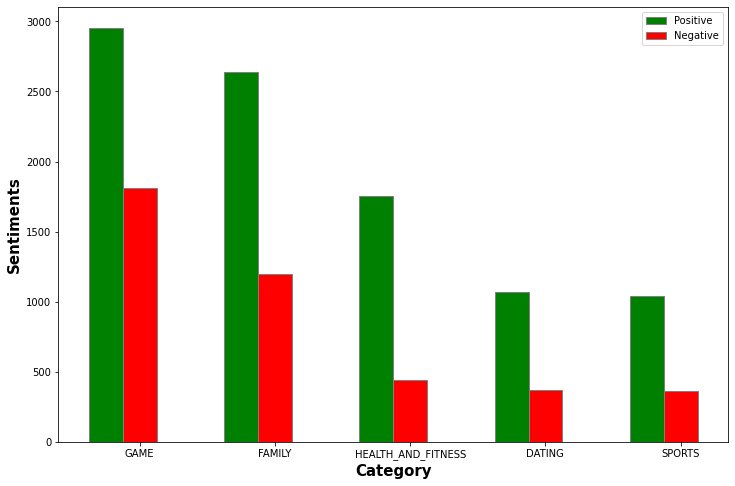

In [ ]:



barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))


pos = no_of_positive_sentiment['Positive_Sentiment'].head()
neg = no_of_negative_sentiment['Negative_Sentiment'].head()


bar1 = np.arange(len(pos))
bar2 = [x + barWidth for x in bar1]


plt.bar(bar1, pos, color ='g', width = barWidth,
		edgecolor ='grey', label ='Positive')
plt.bar(bar2, neg, color ='r', width = barWidth,
		edgecolor ='grey', label ='Negative')


plt.xlabel('Category', fontweight ='bold', fontsize = 15)
plt.ylabel('Sentiments', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(pos))],
		[list_cat[0], list_cat[1], list_cat[2], list_cat[3], list_cat[4]])

plt.legend()
plt.show()


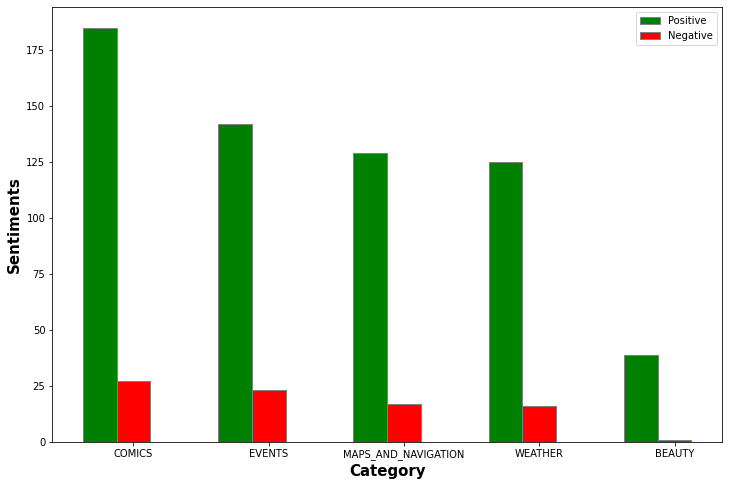

In [ ]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))


pos_low = no_of_positive_sentiment['Positive_Sentiment'].tail()
neg_low = no_of_negative_sentiment['Negative_Sentiment'].tail()


bar1 = np.arange(len(pos_low))
bar2 = [x + barWidth for x in bar1]


plt.bar(bar1, pos_low, color ='g', width = barWidth,
        edgecolor ='grey', label ='Positive')
plt.bar(bar2, neg_low, color ='r', width = barWidth,
        edgecolor ='grey', label ='Negative')


plt.xlabel('Category', fontweight ='bold', fontsize = 15)
plt.ylabel('Sentiments', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(pos_low))],
        [list_cat[-1], list_cat[-2], list_cat[-3], list_cat[-4], list_cat[-5]])

plt.legend()
plt.show()

In [ ]:
mixed_sentiment = no_of_positive_sentiment
mixed_sentiment['Negative_Sentiment'] = no_of_negative_sentiment['Negative_Sentiment']

In [ ]:
def mix_sen(posp, negp):
  total_val = posp + negp
  mix_perc = (posp/total_val)*100
  return mix_perc

mixed_sentiment['Positive_percentage'] = mixed_sentiment.apply(lambda x: mix_sen(x['Positive_Sentiment'], x['Negative_Sentiment']), axis = 1)

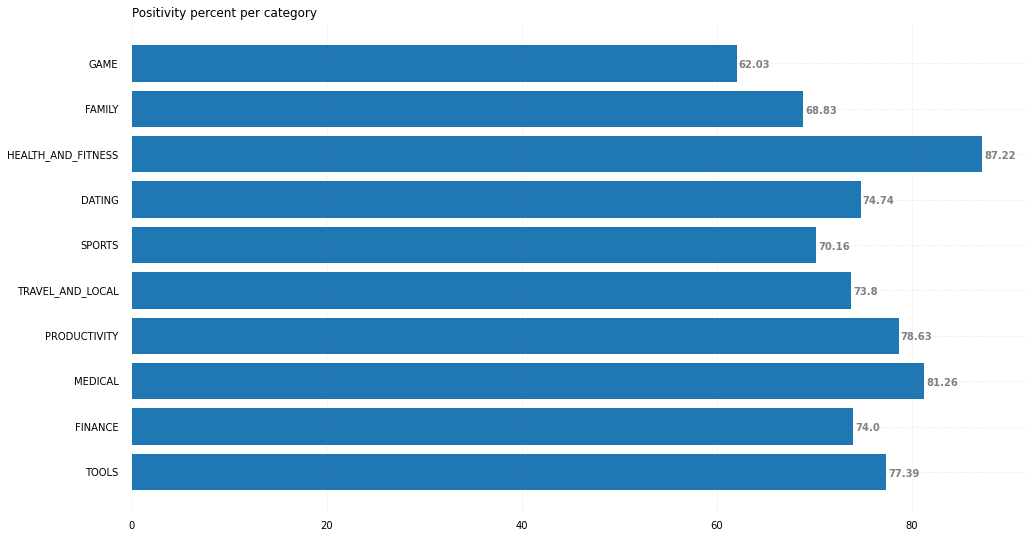

In [ ]:
fig, grh = plt.subplots(figsize =(16, 9))
 
grh.barh(mixed_sentiment['Category_new'][0:10], mixed_sentiment['Positive_percentage'][0:10])
 
for s in ['top', 'bottom', 'left', 'right']:
    grh.spines[s].set_visible(False)
 
grh.xaxis.set_ticks_position('none')
grh.yaxis.set_ticks_position('none')
 
grh.xaxis.set_tick_params(pad = 5)
grh.yaxis.set_tick_params(pad = 10)
 
grh.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
grh.invert_yaxis()
 
for i in grh.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
grh.set_title('Positivity percent per category',
             loc ='left', )
 
plt.show()


Inference: From above graphs we can conclude that GAME, FAMILY, HEALTH AND FITNESS, DATING and SPORTS are the top 5 categories with the most positive and negative reviews. The bottom 5 categories with the least number of reviews are BEAUTY, WEATHER, MAPA AND NAVIGATION, EVENTS and COMICS. The top 5 categories with most positivity percentage among all are HEALTH AND FITNESS, MEDICAL, PRODUCTIVITY, TOOLS and DATING.


# Number of apps in each category

In [ ]:
Total_Number_of_Apps_free = df_free['Category'].value_counts()
Total_Number_of_Apps_paid = df_paid['Category'].value_counts()

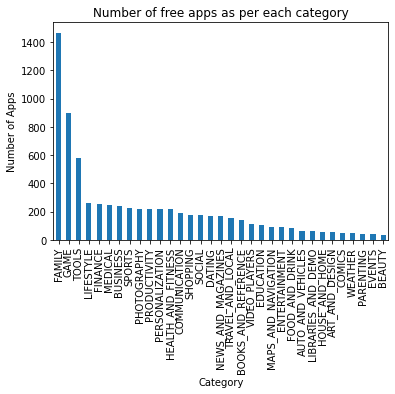

In [ ]:
Total_Number_of_Apps_free.plot(kind='bar')

plt.title('Number of free apps as per each category')
plt.ylabel('Number of Apps')
plt.xlabel('Category')
plt.rcParams['figure.figsize'] = (23, 5)

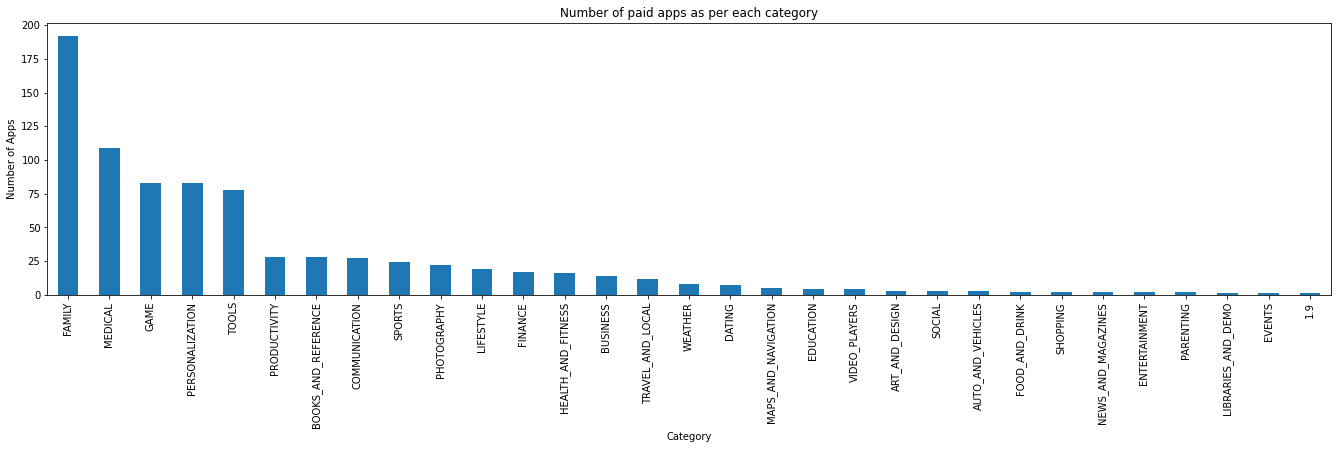

In [ ]:
Total_Number_of_Apps_paid.plot(kind='bar')

plt.title('Number of paid apps as per each category')
plt.ylabel('Number of Apps')
plt.xlabel('Category')
plt.rcParams['figure.figsize'] = (23, 5)

Inference: FAMILY, GAME, TOOLS, LIFESTYLE and FINANCE are the top 5 categories with most number of free apps. BEAUTY, EVENTS, PARENTING, WEATHER and COMICS are the bottom 5 categories with least number of free apps. FAMILY, MEDICAL, GAME, PERSONALIZATION and TOOLS are the top 5 categories with most number of paid apps. EVENTS, LIBRARIES AND DEMO, PARENTING, ENTERTAINMENT and NEWS AND MAGAZINES are the bottom 5 categories with least number of paid apps.


# Number of apps according to the number of reviews

In [ ]:
unq_category = df_free['Category'].unique()

In [ ]:
df_free['Reviews'] = df_free.apply(lambda x: int(x['Reviews']), axis=1)

each_category = df_free.groupby('Category')['Reviews'].sum().reset_index()

each_category.sort_values('Reviews', ascending=False, inplace=True)

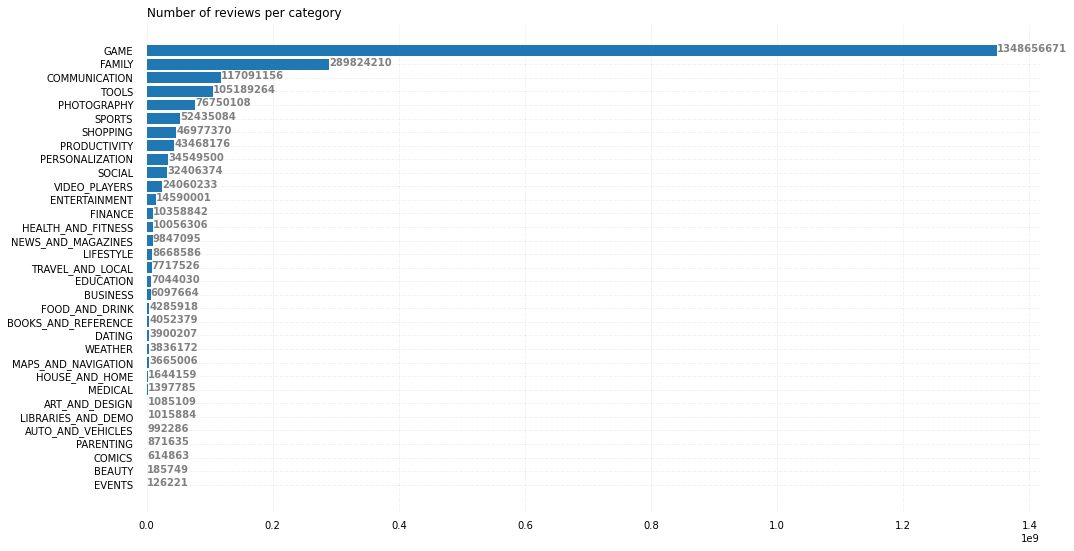

In [ ]:
fig, gra = plt.subplots(figsize =(16, 9))
 
gra.barh(each_category['Category'], each_category['Reviews'])
 
for s in ['top', 'bottom', 'left', 'right']:
    gra.spines[s].set_visible(False)
 
gra.xaxis.set_ticks_position('none')
gra.yaxis.set_ticks_position('none')
 
gra.xaxis.set_tick_params(pad = 5)
gra.yaxis.set_tick_params(pad = 10)
 
gra.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
gra.invert_yaxis()
 
for i in gra.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
gra.set_title('Number of reviews per category',
             loc ='left', )
 
plt.show()

Inference: GAME has the most number of total reviews which is followed by FAMILY, COMMUNICATION, TOOLS and PHOTOGRAPHY.
EVENTS has the least number of total reviews which is lead by BEAUTY, COMICS, PARENTING and AUTO_AND_VEHICLES.


# Number of installs each category.

In [ ]:
cat_down = df_free.groupby('Category')['new_Installs'].sum().reset_index()
cat_down.sort_values('new_Installs', ascending = False, inplace = True)

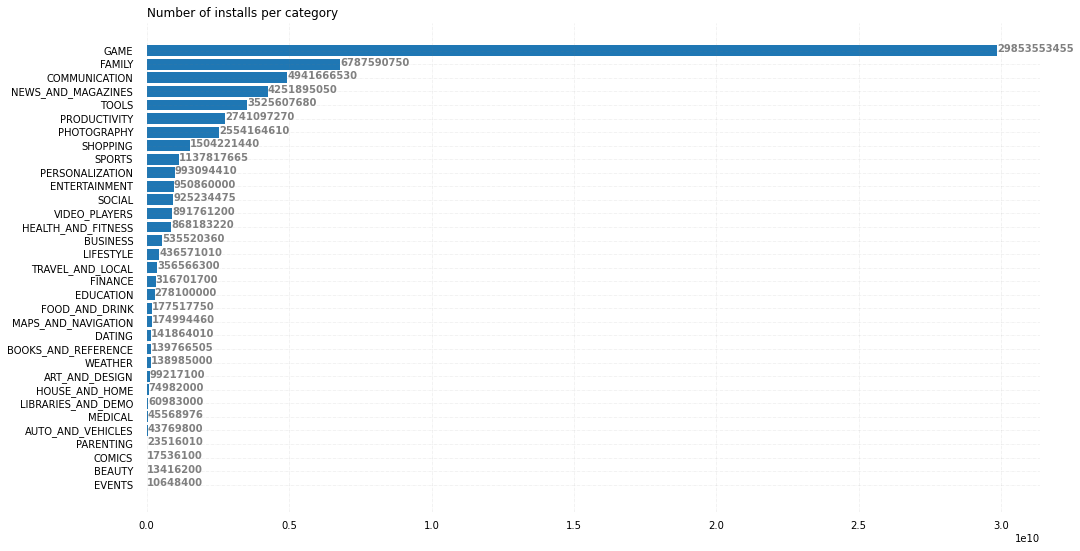

In [ ]:
fig, gh = plt.subplots(figsize =(16, 9))
 
gh.barh(cat_down['Category'], cat_down['new_Installs'])
 
for s in ['top', 'bottom', 'left', 'right']:
    gh.spines[s].set_visible(False)
 
gh.xaxis.set_ticks_position('none')
gh.yaxis.set_ticks_position('none')
 
gh.xaxis.set_tick_params(pad = 5)
gh.yaxis.set_tick_params(pad = 10)
 
gh.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
gh.invert_yaxis()
 
for i in gh.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
gh.set_title('Number of installs per category',
             loc ='left', )
 

plt.show()

Inference: GAME, FAMILY, COMMUNICATION, NEWS_AND_MAGAZINES and TOOLS are the top 5 categories with most installs. EVENTS, BEAUTY, COMICS, PARENTING and AUTO AND VEHICLES are the bottom 5 categories with least installs.


# Number of apps as per number of installs on each size

In [ ]:
Size_down = df_free.groupby('new_Size')['new_Installs'].sum().reset_index()
Size_down.sort_values('new_Size', ascending='True')

,new_Size,new_Installs
0,0.007812,50000
1,0.010742,1000000
2,0.017578,5000
3,0.019531,100000
4,0.022461,100000
...,...,...
285,96.000000,535800000
286,97.000000,1062711000
287,98.000000,428152000
288,99.000000,834560000


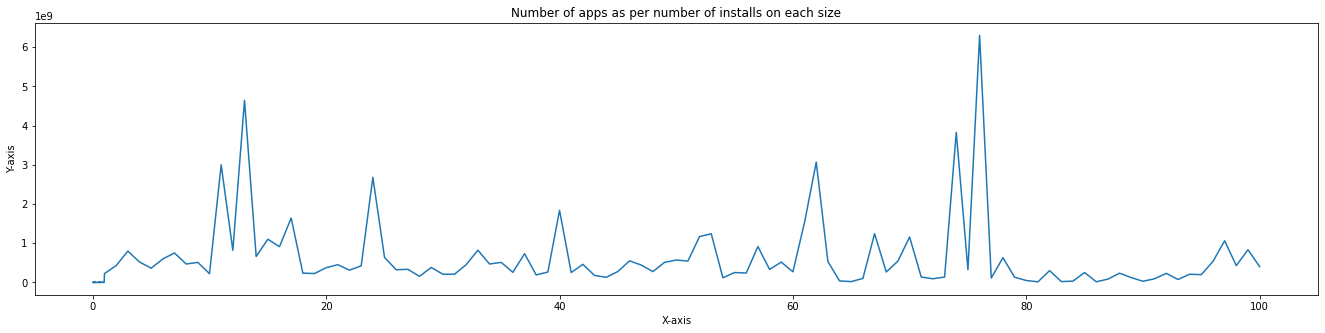

In [ ]:
plt.plot(Size_down['new_Size'], Size_down['new_Installs'])
plt.xlabel("X-axis")  
plt.ylabel("Y-axis") 
plt.title("Number of apps as per number of installs on each size")
plt.show()

Inference: From the above graph we can determine that between the size 60 MB and 80 MB most of the number of apps.

## Number of apps as per ratings

In [ ]:
Poor = df_free_Poor.groupby('Category')['new_Rating'].count().reset_index().sort_values('new_Rating', ascending = False)
Average = df_free_Average.groupby('Category')['new_Rating'].count().reset_index().sort_values('new_Rating', ascending = False)
Good = df_free_Good.groupby('Category')['new_Rating'].count().reset_index().sort_values('new_Rating', ascending = False)
Very_Good = df_free_Very_Good.groupby('Category')['new_Rating'].count().reset_index().sort_values('new_Rating', ascending = False)
Excellent = df_free_Excellent.groupby('Category')['new_Rating'].count().reset_index().sort_values('new_Rating', ascending = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


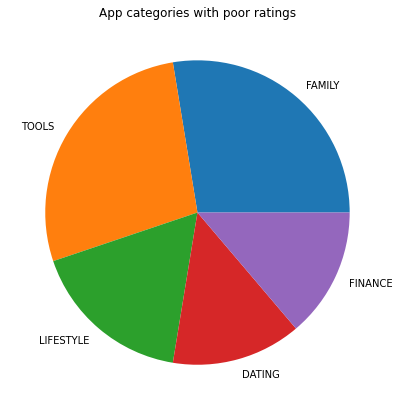

In [ ]:
Category_poor = list(Poor['Category'].head(5))
 
poor_val = [Poor['new_Rating'].head()]
 
fig = plt.figure(figsize =(10, 7))
plt.pie(poor_val, labels = Category_poor)
plt.title("App categories with poor ratings")
 
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


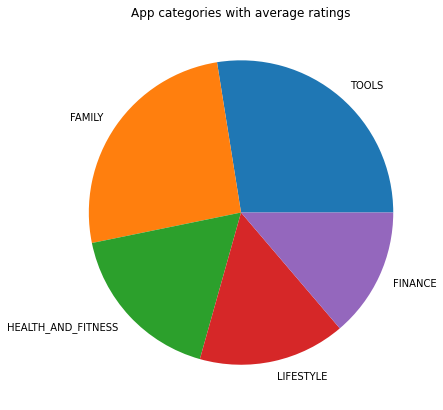

In [ ]:
Category_average = list(Average['Category'].head(5))
 
average_val = [Average['new_Rating'].head()]
 
fig = plt.figure(figsize =(10, 7))
plt.pie(average_val, labels = Category_average)
plt.title("App categories with average ratings")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


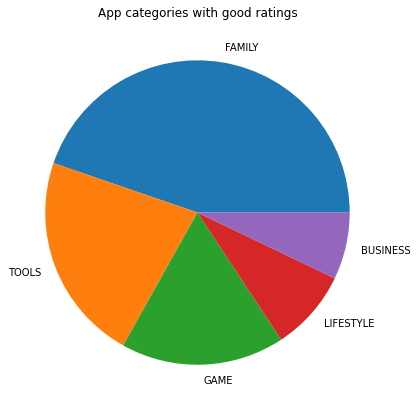

In [ ]:
Category_good = list(Good['Category'].head(5))
 
good_val = [Good['new_Rating'].head()]
 
fig = plt.figure(figsize =(10, 7))
plt.pie(good_val, labels = Category_good)
plt.title("App categories with good ratings")
 
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


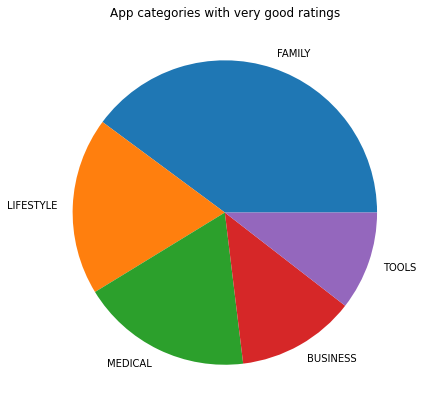

In [ ]:
Category_very_good = list(Very_Good['Category'].head(5))
 
very_good_val = [Very_Good['new_Rating'].head()]
 
fig = plt.figure(figsize =(10, 7))
plt.pie(very_good_val, labels = Category_very_good)
plt.title("App categories with very good ratings")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


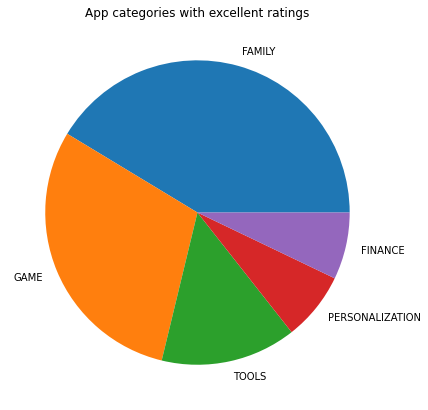

In [ ]:
Category_excellent = list(Excellent['Category'].head(5))
 
excellent_val = [Excellent['new_Rating'].head()]
 
fig = plt.figure(figsize =(10, 7))
plt.pie(excellent_val, labels = Category_excellent)
plt.title("App categories with excellent ratings")
plt.show()

Inference:
FAMILY, TOOLS, FINANCE, LIFESTYLE and DATING are the top categories with poor rating.

FAMILY, TOOLS, FINANCE, LIFESTYLE and HEALTH AND FITNESS are the top categories with average rating.

FAMILY, TOOLS, GAME, LIFESTYLE and BUSINESS are the top categories with good rating.

FAMILY, TOOLS, MEDICAL, LIFESTYLE and BUSINESS are the top categories with very good rating.
FAMILY, FINANCE, GAME, TOOLS and PERSONALIZATION are the top categories with good rating.